In [1]:
import pandas as pd

data = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_Performance_2014Q1to2014Q4.csv',
                   sep='|',low_memory=False)

data.shape

(1395365, 34)

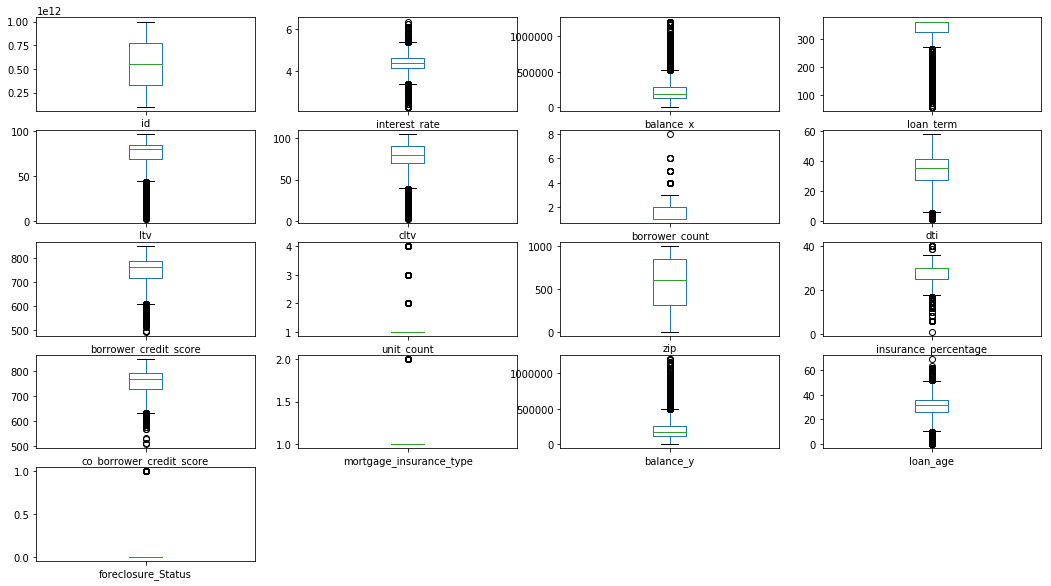

In [7]:
# Outlier detection - Graphically
import matplotlib.pyplot as plt
# data.iloc[:,0:20].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
data.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

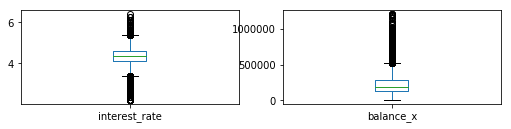

In [8]:
# Outlier detection - Graphically
import matplotlib.pyplot as plt
data.iloc[:,1:5].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

In [9]:
# Outlier detection - Qunatitativly
# Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy import stats
import numpy as np

df = data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print((((df.interest_rate < (Q1.interest_rate - 1.5 * IQR.interest_rate)) 
        | (df.interest_rate > (Q3.interest_rate + 1.5 * IQR.interest_rate))).sum()/(df.interest_rate.shape[0])*100))

# print(IQR)
# print("\n")
# print(Q1)
# print("\n")
# print(Q3)

print("The outlier percentage for Interest rate is - " + "{:.2f}".format(((df.interest_rate < (Q1.interest_rate - 1.5 * IQR.interest_rate)) | (df.interest_rate > (Q3.interest_rate + 1.5 * IQR.interest_rate))).sum()/(df.interest_rate.shape[0])*100))
print("The outlier percentage for balance_x is - " + "{:.2f}".format(((df.balance_x < (Q1.balance_x - 1.5 * IQR.balance_x)) | (df.balance_x > (Q3.balance_x + 1.5 * IQR.balance_x))).sum()/(df.balance_x.shape[0])*100))
print("The outlier percentage for loan_term is - " + "{:.2f}".format(((df.loan_term < (Q1.loan_term - 1.5 * IQR.loan_term)) | (df.loan_term > (Q3.loan_term + 1.5 * IQR.loan_term))).sum()/(df.loan_term.shape[0])*100))
print("The outlier percentage for ltv is - " + "{:.2f}".format(((df.ltv < (Q1.ltv - 1.5 * IQR.ltv)) | (df.ltv > (Q3.ltv + 1.5 * IQR.ltv))).sum()/(df.ltv.shape[0])*100))
print("The outlier percentage for cltv is - " + "{:.2f}".format(((df.cltv < (Q1.cltv - 1.5 * IQR.cltv)) | (df.cltv > (Q3.cltv + 1.5 * IQR.cltv))).sum()/(df.cltv.shape[0])*100))
print("The outlier percentage for dti is - " + "{:.2f}".format(((df.dti < (Q1.dti - 1.5 * IQR.dti)) | (df.dti > (Q3.dti + 1.5 * IQR.dti))).sum()/(df.dti.shape[0])*100))
print("The outlier percentage for borrower_credit_score is - " + "{:.2f}".format(((df.borrower_credit_score < (Q1.borrower_credit_score - 1.5 * IQR.borrower_credit_score)) | (df.borrower_credit_score > (Q3.borrower_credit_score + 1.5 * IQR.borrower_credit_score))).sum()/(df.borrower_credit_score.shape[0])*100))
print("The outlier percentage for loan_age is - " + "{:.2f}".format(((df.loan_age < (Q1.loan_age - 1.5 * IQR.loan_age)) | (df.loan_age > (Q3.loan_age + 1.5 * IQR.loan_age))).sum()/(df.loan_age.shape[0])*100))

4.559882181364733
The outlier percentage for Interest rate is - 4.56
The outlier percentage for balance_x is - 1.64
The outlier percentage for loan_term is - 24.41
The outlier percentage for ltv is - 6.23
The outlier percentage for cltv is - 4.16
The outlier percentage for dti is - 0.08
The outlier percentage for borrower_credit_score is - 0.01
The outlier percentage for loan_age is - 7.68


In [19]:
sum(df.interest_rate)

6024066.649003674

In [78]:
df1 = df.iloc[:5,:4];df1

,id,channel,seller,interest_rate
0,100000506220,R,OTHER,4.750
1,100006392566,R,"PNC BANK, N.A.",3.500
2,100007679737,R,OTHER,5.000
3,100008410787,C,FREEDOM MORTGAGE CORP.,4.375
4,100009360302,C,OTHER,5.250


In [79]:
def test(df):
    df = df.copy(deep=True)
    df['tt'] = np.nan
    return df

In [80]:
test(df1)

,id,channel,seller,interest_rate,tt
0,100000506220,R,OTHER,4.750,NaN
1,100006392566,R,"PNC BANK, N.A.",3.500,NaN
2,100007679737,R,OTHER,5.000,NaN
3,100008410787,C,FREEDOM MORTGAGE CORP.,4.375,NaN
4,100009360302,C,OTHER,5.250,NaN


In [84]:
df1.interest_rate.sum()

22.875

In [137]:
def test1(variable_name):
#     return variable_name + ' A'
    return variable_name*Q1
#     return Q1.variable_name
#     return (df1['variable_name'])
#     a = 0
#     a = df1['variable_name'].sum()
#     return (a)
        

In [139]:
test1(df1['interest_rate'])

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3140: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
id                         NaN
interest_rate              NaN
balance_x                  NaN
loan_term                  NaN
ltv                        NaN
cltv                       NaN
borrower_count             NaN
dti                        NaN
borrower_credit_score      NaN
unit_count                 NaN
zip                        NaN
insurance_percentage       NaN
co_borrower_credit_score   NaN
mortgage_insurance_type    NaN
balance_y                  NaN
loan_age                   NaN
foreclosure_Status         NaN
dtype: float64

In [106]:
def test(variable_name):
#     return (variable_name < (Q1.variable_name - 1.5 * IQR.variable_name))
    return (sum(df.variable_name))
#     return ("{:.2f}".format(((variable_name < (Q1.variable_name - 1.5 * IQR.variable_name)) | (variable_name > (Q3.variable_name + 1.5 * IQR.variable_name))).sum()/(variable_name.shape[0])*100))


In [107]:
# print('testing:', test(interest_rate))
test(interest_rate)

NameError: name 'interest_rate' is not defined

In [9]:
from scipy import stats
import numpy as np

df = data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("{:.2f}".format(((df.interest_rate < (Q1.interest_rate - 1.5 * IQR.interest_rate)) | (df.interest_rate > (Q3.interest_rate + 1.5 * IQR.interest_rate))).sum()/(df.interest_rate.shape[0])*100))

4.56
